#Disease Prediction Machine Learning Demonstration
Author: Devkumar Banerjee
##Part 1: Import data, manipulation/visualization libararies
####We Download/import the specified dataset and the necessary libraries

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
sns.set(style="whitegrid")

In [ ]:
!pip install gdown
!gdown --id 1-0nE61sZLZp3D5pJLiTn3xDMiV6iXnv5

Downloading...
From: https://drive.google.com/uc?id=1-0nE61sZLZp3D5pJLiTn3xDMiV6iXnv5
To: /content/DiseasePrediction.csv
100% 632k/632k [00:00<00:00, 41.8MB/s]


In [ ]:
df = pd.read_csv("/content/DiseasePrediction.csv")

##Part 2: Data Manipulation
####We manipulate the dataframe to end up with Symptoms in the columns and diagnosed diseases in the rows. 

In [ ]:
cols = [i for i in df.iloc[:,1:].columns]

In [ ]:
# Turns all columns in 'cols' to variable column.
# The number of rows of tmp DataFrame is 17x from the original DataFrame

tmp = pd.melt(df.reset_index(), id_vars = ['index'], value_vars = cols )
tmp['add1'] = 1
tmp.head()

,index,variable,value,add1
0,0,Symptom_1,itching,1
1,1,Symptom_1,skin_rash,1
2,2,Symptom_1,itching,1
3,3,Symptom_1,itching,1
4,4,Symptom_1,itching,1


In [ ]:
# Pivot table
dfpivot = pd.pivot_table(tmp, 
                          values = 'add1',
                          index = 'index',
                          columns = 'value')

# Add labels column
dfpivot.insert(0,'label',df['Disease'])
# Fill NaN with zero
df = dfpivot.fillna(0)

In [ ]:
df

value,label,abdominal_pain,abnormal_menstruation,acidity,acute_liver_failure,altered_sensorium,anxiety,back_pain,belly_pain,blackheads,bladder_discomfort,blister,blood_in_sputum,bloody_stool,blurred_and_distorted_vision,breathlessness,brittle_nails,bruising,burning_micturition,chest_pain,chills,cold_hands_and_feets,coma,congestion,constipation,continuous_feel_of_urine,continuous_sneezing,cough,cramps,dark_urine,dehydration,depression,diarrhoea,dischromic _patches,distention_of_abdomen,dizziness,drying_and_tingling_lips,enlarged_thyroid,excessive_hunger,extra_marital_contacts,...,restlessness,runny_nose,rusty_sputum,scurring,shivering,silver_like_dusting,sinus_pressure,skin_peeling,skin_rash,slurred_speech,small_dents_in_nails,spinning_movements,spotting_ urination,stiff_neck,stomach_bleeding,stomach_pain,sunken_eyes,sweating,swelled_lymph_nodes,swelling_joints,swelling_of_stomach,swollen_blood_vessels,swollen_extremeties,swollen_legs,throat_irritation,toxic_look_(typhos),ulcers_on_tongue,unsteadiness,visual_disturbances,vomiting,watering_from_eyes,weakness_in_limbs,weakness_of_one_body_side,weight_gain,weight_loss,yellow_crust_ooze,yellow_urine,yellowing_of_eyes,yellowish_skin,itching
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,Fungal infection,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Fungal infection,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Fungal infection,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,Fungal infection,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,Fungal infection,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,(vertigo) Paroymsal Positional Vertigo,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4916,Acne,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

##Part 3: Declare features and labels, and train the model
####We declare the inputs (Symptoms) and Outputs (Diagnosis) of our model, split our data into training and testing sets. We then train the model using a Random Forest Classifer.

In [ ]:
 X = df.drop('label', axis = 1)
 y = df['label']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)

In [ ]:
from sklearn.metrics import *
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Define the model. Set random_state to 1
clf = RandomForestClassifier(random_state=3)
# fit your model
model = clf.fit(X_train, y_train)

##Part 4: Post-training data analysis/visualization
####We determine which symptoms have the highest effect on your diagnosis,  test the model on its accuracy, and dump the model to a file which we can load for use later.

In [ ]:
# view the feature scores

feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

value
 muscle_pain                 0.016875
 lack_of_concentration       0.015999
 joint_pain                  0.015933
 altered_sensorium           0.015901
 fatigue                     0.015050
                               ...   
 puffy_face_and_eyes         0.002000
 cold_hands_and_feets        0.001556
 drying_and_tingling_lips    0.001267
 weight_gain                 0.001038
 swollen_blood_vessels       0.001031
Length: 131, dtype: float64

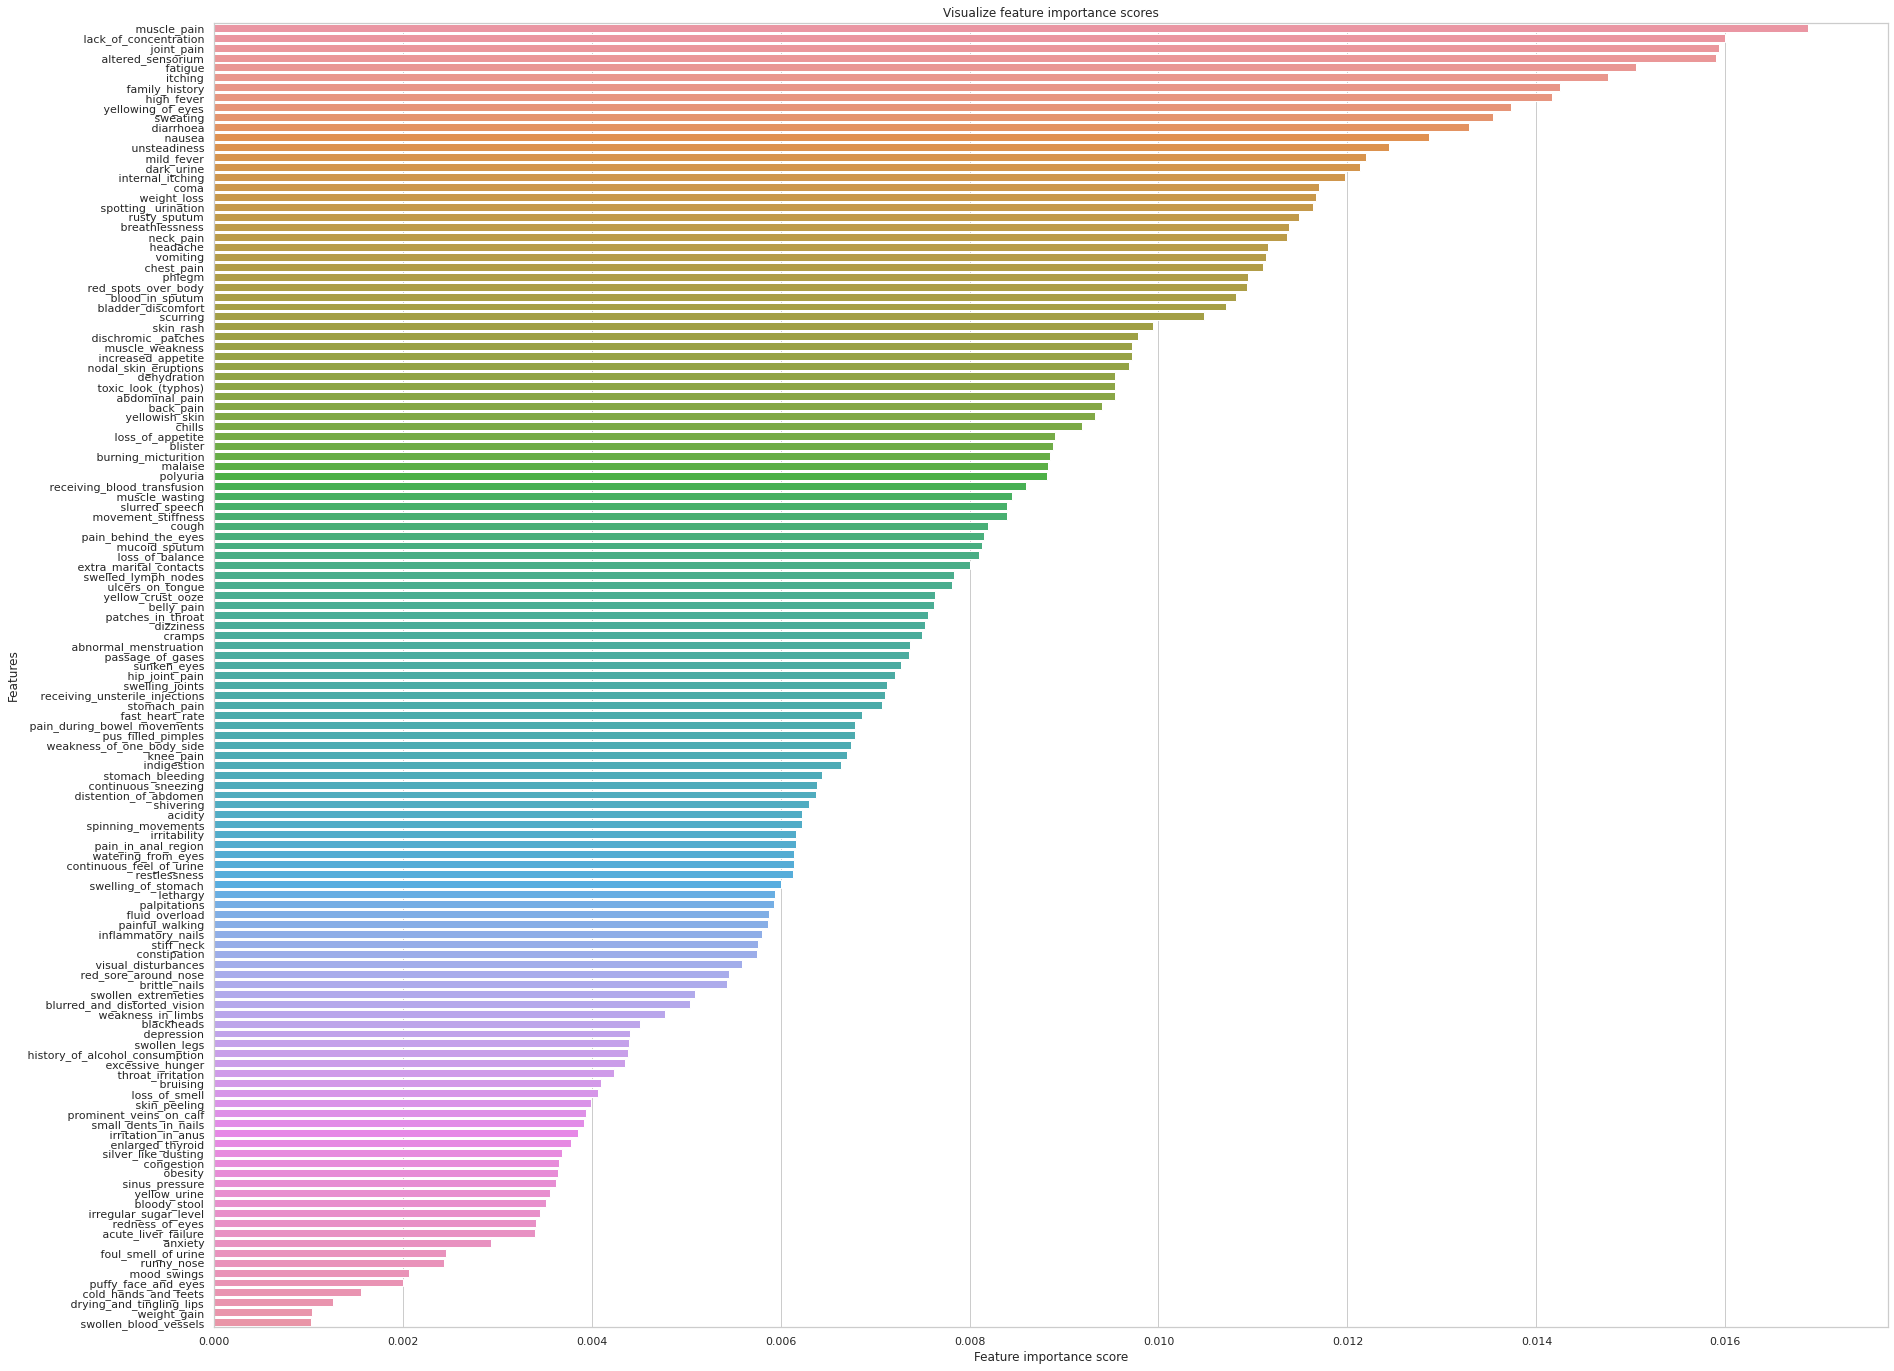

In [ ]:
f, ax = plt.subplots(figsize=(30, 24))
ax = sns.barplot(x=feature_scores, y=feature_scores.index)
ax.set_title("Visualize feature importance scores")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

In [ ]:
predictions=model.predict(X_test)
print(classification_report(y_true=y_test.values, y_pred=predictions))

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        29
                                   AIDS       1.00      1.00      1.00        26
                                   Acne       1.00      1.00      1.00        29
                    Alcoholic hepatitis       1.00      1.00      1.00        30
                                Allergy       1.00      1.00      1.00        30
                              Arthritis       1.00      1.00      1.00        25
                       Bronchial Asthma       1.00      1.00      1.00        36
                   Cervical spondylosis       1.00      1.00      1.00        30
                            Chicken pox       1.00      1.00      1.00        29
                    Chronic cholestasis       1.00      1.00      1.00        33
                            Common Cold       1.00      1.00      1.00        28
                           

In [ ]:
from joblib import dump, load
dump(clf, '20210716-DiseasePredictionModelDump.joblib') 

['20210716-DiseasePredictionModelDump.joblib']

In [ ]:
# # Import your model
# loadedmodel = load('20210716-DiseasePredictionModelDump.joblib')
# loadedpredictions=loadedmodel.predict(X_test)
# print(classification_report(y_true=y_test.values, y_pred=loadedpredictions))

##Part 5: Try it yourself!
###The following names represent the order of the symptoms in the array cell before. Try using different symptom sets to see what the model diagnoses!
1. abdominal_pain
2. abnormal_menstruation
3. acidity
4. acute_liver_failure
5. altered_sensorium
6. anxiety
7. back_pain
8. belly_pain
9. blackheads
10. bladder_discomfort
11. blister
12. blood_in_sputum
13. bloody_stool
14. blurred_and_distorted_vision
15. breathlessness
16. brittle_nails
17. bruising
18. burning_micturition
19. chest_pain
20. chills
21. cold_hands_and_feets
22. coma
23. congestion
24. constipation
25. continuous_feel_of_urine
26. continuous_sneezing
27. cough
28. cramps
29. dark_urine
30. dehydration
31. depression
32. diarrhoea
33. dischromic _patches
34. distention_of_abdomen
35. dizziness
36. drying_and_tingling_lips
37. enlarged_thyroid
38. excessive_hunger
39. extra_marital_contacts
40. family_history
41. fast_heart_rate
42. fatigue
43. fluid_overload
44. foul_smell_of urine
45. headache
46. high_fever
47. hip_joint_pain
48. history_of_alcohol_consumption
49. increased_appetite
50. indigestion
51. inflammatory_nails
52. internal_itching
53. irregular_sugar_level
54. irritability
55. irritation_in_anus
56. joint_pain
57. knee_pain
58. lack_of_concentration
59. lethargy
60. loss_of_appetite
61. loss_of_balance
62. loss_of_smell
63. malaise
64. mild_fever
65. mood_swings
66. movement_stiffness
67. mucoid_sputum
68. muscle_pain
69. muscle_wasting
70. muscle_weakness
71. nausea
72. neck_pain
73. nodal_skin_eruptions
74. obesity
75. pain_behind_the_eyes
76. pain_during_bowel_movements
77. pain_in_anal_region
78. painful_walking
79. palpitations
80. passage_of_gases
81. patches_in_throat
82. phlegm
83. polyuria
84. prominent_veins_on_calf
85. puffy_face_and_eyes
86. pus_filled_pimples
87. receiving_blood_transfusion
88. receiving_unsterile_injections
89. red_sore_around_nose
90. red_spots_over_body
91. redness_of_eyes
92. restlessness
93. runny_nose
94. rusty_sputum
95. scurring
96. shivering
97. silver_like_dusting
98. sinus_pressure
99. skin_peeling
100. skin_rash
101. slurred_speech
102. small_dents_in_nails
103. spinning_movements
104. spotting_ urination
105. stiff_neck
106. stomach_bleeding
107. stomach_pain
108. sunken_eyes
109. sweating
110. swelled_lymph_nodes
111. swelling_joints
112. swelling_of_stomach
113. swollen_blood_vessels
114. swollen_extremeties
115. swollen_legs
116. throat_irritation
117. toxic_look_(typhos)
118. ulcers_on_tongue
119. unsteadiness
120. visual_disturbances
121. vomiting
122. watering_from_eyes
123. weakness_in_limbs
124. weakness_of_one_body_side
125. weight_gain
126. weight_loss
127. yellow_crust_ooze
128. yellow_urine
129. yellowing_of_eyes
130. yellowish_skin
131. itching


In [ ]:
input_pred = np.array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.]])
input_pred.reshape(1, -1)
output_pred = model.predict(input_pred)

In [ ]:
# Uncomment the line below to show your diagnosis
#output_pred

In [ ]:
df

value,label,abdominal_pain,abnormal_menstruation,acidity,acute_liver_failure,altered_sensorium,anxiety,back_pain,belly_pain,blackheads,bladder_discomfort,blister,blood_in_sputum,bloody_stool,blurred_and_distorted_vision,breathlessness,brittle_nails,bruising,burning_micturition,chest_pain,chills,cold_hands_and_feets,coma,congestion,constipation,continuous_feel_of_urine,continuous_sneezing,cough,cramps,dark_urine,dehydration,depression,diarrhoea,dischromic _patches,distention_of_abdomen,dizziness,drying_and_tingling_lips,enlarged_thyroid,excessive_hunger,extra_marital_contacts,...,restlessness,runny_nose,rusty_sputum,scurring,shivering,silver_like_dusting,sinus_pressure,skin_peeling,skin_rash,slurred_speech,small_dents_in_nails,spinning_movements,spotting_ urination,stiff_neck,stomach_bleeding,stomach_pain,sunken_eyes,sweating,swelled_lymph_nodes,swelling_joints,swelling_of_stomach,swollen_blood_vessels,swollen_extremeties,swollen_legs,throat_irritation,toxic_look_(typhos),ulcers_on_tongue,unsteadiness,visual_disturbances,vomiting,watering_from_eyes,weakness_in_limbs,weakness_of_one_body_side,weight_gain,weight_loss,yellow_crust_ooze,yellow_urine,yellowing_of_eyes,yellowish_skin,itching
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,Fungal infection,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Fungal infection,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Fungal infection,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,Fungal infection,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,Fungal infection,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,(vertigo) Paroymsal Positional Vertigo,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4916,Acne,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,